# **# Assignment 7: Comparison Between Libraries**: **Using Pandas**

**Group Name:** RAM

**Group Members:**

Ayaz Rahman Bhuiyan (MCS231023)

Mohammed Raza Asfak Chidimar (MCS231004)

Musab Ibne Ahmad (MCS231017)

Hussein Yusuf Sheikh Mohamed (MCS231024)

**Dataset Link: [Water Quality Prediction](https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction)**

### **About Dataset:**

This dataset includes pH, iron, nitrate, chloride, lead, zinc, color, turbidity, fluoride, copper, odor, sulfate, conductivity, manganese, and total dissolved solids. Water source, temperature, air temperature, month, day, and time are also recorded. This dataset helps environmental monitoring and health assessments by providing a holistic view of water quality.

## Loading Dataset

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mitanshuchakrawarty/water-quality-prediction
! unzip water-quality-prediction

 98% 929M/944M [00:11<00:00, 151MB/s]
100% 944M/944M [00:11<00:00, 88.9MB/s]
Archive:  water-quality-prediction.zip
  inflating: dataset.csv             


In [ ]:
# Installing and importing necessary libraries
!pip install vaex
import vaex
import time
import numpy as np
import pandas as pd
import warnings
import gc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [41]:
%%time

dfe = vaex.read_csv("dataset.csv")

CPU times: user 42.2 s, sys: 4.09 s, total: 46.3 s
Wall time: 46.4 s


In [39]:
df.info()

column,type,unit,description,expression
Index,int64,,,
pH,float64,,,
Iron,float64,,,
Nitrate,float64,,,
Chloride,float64,,,
Lead,float64,,,
Zinc,float64,,,
Color,str,,,
Turbidity,float64,,,
Fluoride,float64,,,


## Statistical Measures

In [ ]:
num_elements = df.shape[0] * df.shape[1]
print(f"Total number of elements in the DataFrame: {num_elements}")

Total number of elements in the DataFrame: 142964208


In [ ]:
# Get the number of rows and columns in the Vaex DataFrame
num_rows, num_columns = df.shape
print(f"Number of rows in the Vaex DataFrame: {num_rows}")
print(f"Number of columns in the Vaex DataFrame: {num_columns}")

Number of rows in the Vaex DataFrame: 5956842
Number of columns in the Vaex DataFrame: 24


In [ ]:
print("\nDataFrame description:")
print(df.describe())


DataFrame description:
                    Index                 pH                 Iron  \
data_type           int64            float64              float64   
count             5956842            5840788              5917089   
NA                      0             116054                39753   
mean            2978420.5  7.445372942729031  0.12790273707721542   
std        1719592.166114           0.888166             0.479991   
min                     0           1.057113                  0.0   
max               5956841          12.910719            19.353145   

                     Nitrate           Chloride                   Lead  \
data_type            float64            float64                float64   
count                5851117            5781311                5929933   
NA                    105725             175531                  26909   
mean       6.169969758594278  184.2969805426384  0.0014983363203903348   
std                 3.256666          68.428278      

In [28]:
import vaex

class DfOverview:
    def __init__(self, df: vaex.dataframe.DataFrame) -> None:
        self.df = df

    def missing_value(self):
        return self.df.ismissing().sum()

    def percentage(self, values):
        return [f"{(value / len(self.df) * 100):.2f}%" for value in values]

    def get_overview(self):
        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype'
        ]

        data = zip(
            self.df.get_column_names(),
            self.df.count().values,
            self.missing_value(),
            self.percentage(self.missing_value()),
            [self.df[column].nunique() for column in self.df.get_column_names()],
            self.percentage([self.df[column].nunique() for column in self.df.get_column_names()]),
            [self.df[column].dtype for column in self.df.get_column_names()]
        )

        return vaex.from_pandas(pd.DataFrame(data=data, columns=columns), copy_index=False)

In [29]:
def missing_values_table(df):
    mis_val = df.ismissing().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_dtype = df.dtypes

    mis_val_table = vaex.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

    mis_val_table = mis_val_table[mis_val_table.iloc[:, 0] != 0].sort('% of Total Values', ascending=False).round(2)

    print(f"Your selected dataframe has {df.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table if mis_val_table.shape[0] > 0 else None

In [30]:
def percent_missing_values(df):
    total_cells = vaex.utils.unreduce(vaex.utils.reduce(np.multiply, df.shape))
    missing_count = df.ismissing().sum()
    total_missing = missing_count.sum()

    print(f"The dataset contains {round((total_missing / total_cells) * 100, 2)}% missing values.")

In [31]:
df_overview = DfOverview(df)
df_overview.get_overview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Index,5956842,0,0.00%,5956842,100.00%,int64
1,pH,5840788,116054,1.95%,5604784,94.09%,float64
2,Iron,5917089,39753,0.67%,5674876,95.27%,float64
3,Nitrate,5851117,105725,1.77%,5614445,94.25%,float64
4,Chloride,5781311,175531,2.95%,5549789,93.17%,float64
5,Lead,5929933,26909,0.45%,5542383,93.04%,float64
6,Zinc,5800716,156126,2.62%,5567922,93.47%,float64
7,Color,5951103,5739,0.10%,5,0.00%,object
8,Turbidity,5907027,49815,0.84%,5665514,95.11%,float64
9,Fluoride,5767686,189156,3.18%,5537536,92.96%,float64


In [32]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Copper,199402,3.35,float64
Sulfate,197418,3.31,float64
Fluoride,189156,3.18,float64
Odor,178891,3.00,float64
Chloride,175531,2.95,float64
Water Temperature,168233,2.82,float64
Conductivity,163861,2.75,float64
Zinc,156126,2.62,float64
pH,116054,1.95,float64
Time of Day,114519,1.92,float64


In [33]:
percent_missing_values(df)

The dataset contains 1.66 % missing values.


## Visualization

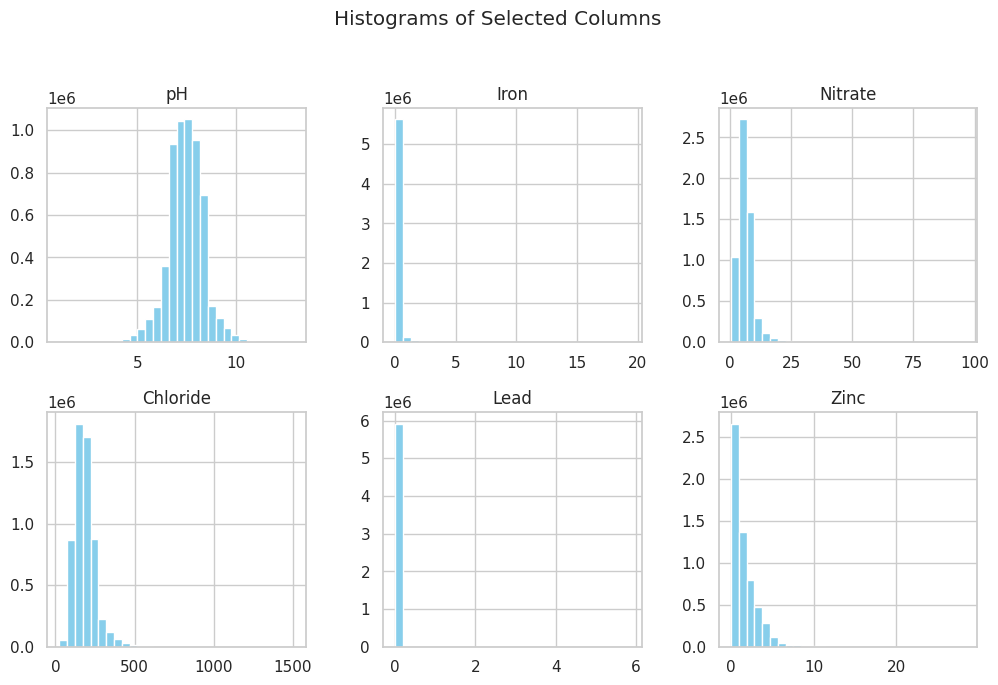

In [51]:
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc']

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot histograms for selected columns using Vaex
vaex.ml.plotting.histogram(df[selected_columns], figsize=(15, 10), layout=(2, 3), color='skyblue')
plt.suptitle('Histograms of Selected Columns', y=1.02)
plt.show()

<ipython-input-58-1d40784a94f4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-58-1d40784a94f4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-58-1d40784a94f4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-58-1d40784a94f4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-58-1d

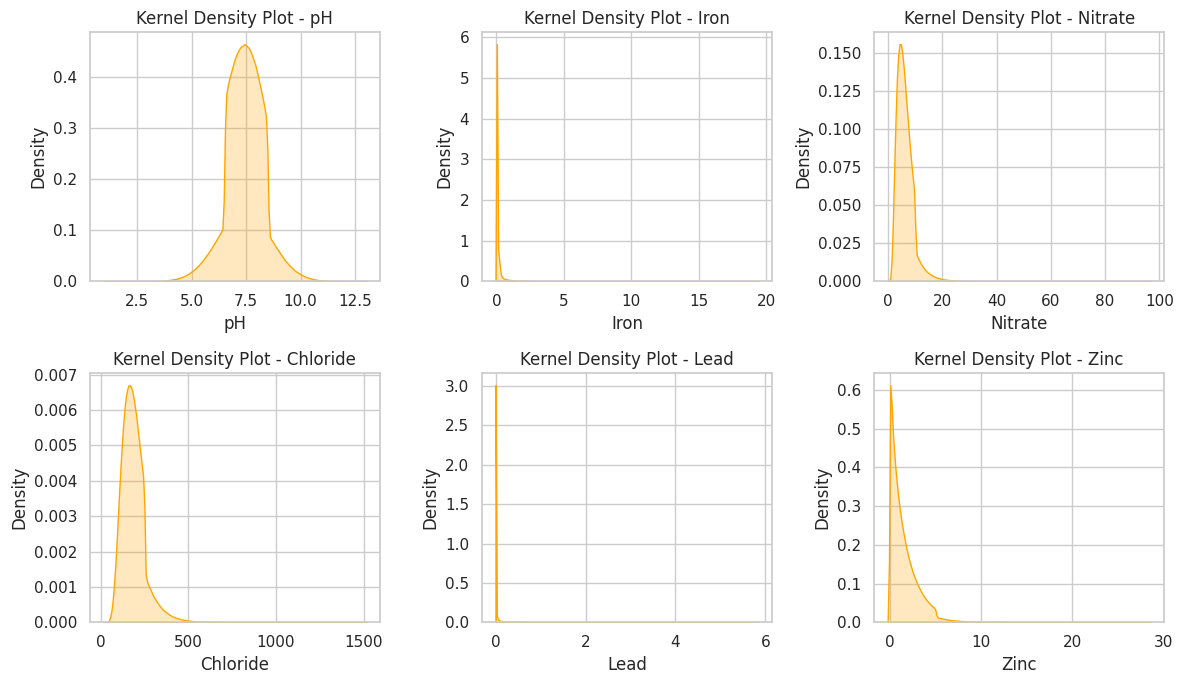

In [58]:
plt.figure(figsize=(12, 7))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(vaex_df[column].to_numpy(), color='orange', shade=True)  # Convert to NumPy array for plotting
    plt.title(f'Kernel Density Plot - {column}')

plt.tight_layout()
plt.show()

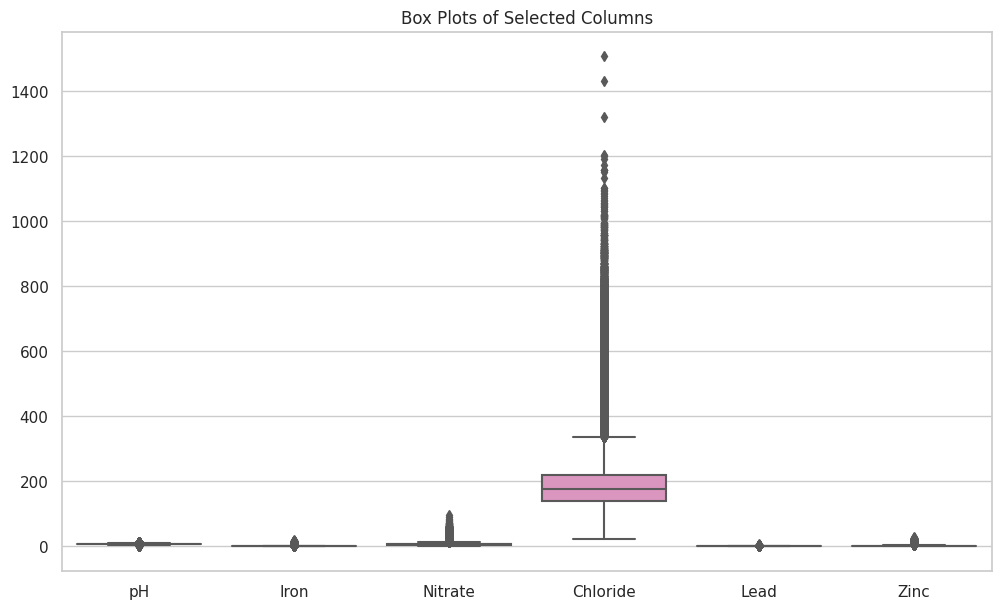

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=selected_columns_df, palette='Set2')
plt.title('Box Plots of Selected Columns')
plt.show()

In [61]:
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Fluoride', 'Copper', 'Sulfate', 'Chlorine', 'Manganese']

selected_df = vaex_df[selected_columns].to_pandas_df()

column_sums = selected_df.sum()

fig = px.pie(names=column_sums.index, values=column_sums.values, title='Distribution of Water Elements', width=700)
fig.show()

# **Pros & Cons of Pandas**

### **Advantages**

**1. Performance:**
Vaex is known for its excellent performance on large datasets. It employs memory mapping and lazy evaluation, resulting in fast and efficient operations.


**2. Memory Efficiency:**
Vaex loads only the necessary portions of the data into memory, making it memory-efficient when dealing with large datasets.

**3. Ease of Use:**
Vaex provides a similar API to Pandas, making it easy for users familiar with Pandas to transition to Vaex.

### **Drawbacks**



**1. Limited Functionality:**
Vaex does not support the full range of Pandas operations. Some features available in Pandas may not be present in Vaex.

**2. Less Resources:**
Vaex, while gaining popularity, may have a smaller community compared to Pandas. This can result in fewer online resources and community support.

**3. Complex Queries:**

Writing complex queries in Vaex might be less intuitive compared to Pandas, as Vaex relies heavily on expressions.

## **Conclusion**

Vaex is an important addition to the Python ecosystem, especially for analysts and data scientists working with enormous datasets. Its emphasis on performance and memory efficiency makes it an excellent choice for data exploration, analysis, and visualization applications. Vaex stands out as a powerful tool that may considerably improve the efficiency and scalability of data analysis operations when working with large datasets or overcoming memory constraints.
